# Part II - Flight Delays and What Causes Them
## by (Mackenzie Shonayi)


## Investigation Overview


> In this investigation my main focus is on delay distributions, relationship between delays and cancellation distribution.


## Dataset Overview

> The dataset im working with contains 27000 records of flights, from 1987 until 2020. My main focus in in delays columns because most of them contained nulls and they were not useful for my investigation

In [30]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [31]:
flightsDF = pd.read_csv("flights_data.csv")

cols = ['Unnamed: 0','Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate','Reporting_Airline',
        'Origin','Dest','DepTime','DepDelay','ArrTime','ArrDelay','Cancelled','CancellationCode','Diverted',
        'AirTime','Flights','Distance','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
flightsDF = flightsDF[cols]

flightsDF['DepDelay'] = flightsDF['DepDelay'].fillna(0)  
flightsDF['ArrTime'] = flightsDF['ArrTime'].fillna(0) 
flightsDF['ArrDelay'] = flightsDF['ArrDelay'].fillna(0) 
flightsDF['CarrierDelay'] = flightsDF['CarrierDelay'].fillna(0) 
flightsDF['WeatherDelay'] = flightsDF['WeatherDelay'].fillna(0) 
flightsDF['NASDelay'] = flightsDF['NASDelay'].fillna(0) 
flightsDF['SecurityDelay'] = flightsDF['SecurityDelay'].fillna(0)
flightsDF['LateAircraftDelay'] = flightsDF['LateAircraftDelay'].fillna(0)
flightsDF[['ArrDelay','ArrTime','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].isnull().values.any()

False

In [32]:
#Defining function for creating subplots
def subplotsDiffData(data1,data2,kinds,plot1labels,plot2labels,titles):
    #Subplots for 
    fig = plt.figure() # create figure
    ax0 = fig.add_subplot(1, 2, 1) 
    ax1 = fig.add_subplot(1, 2, 2) 
    # Subplot 1: Box plot
    data1.plot(x=plot1labels[0], y=plot1labels[1],kind=kinds[0], figsize=(20, 6), ax=ax0) # add to subplot 1
    ax0.set_title(titles[0])
    ax0.set_xlabel(plot1labels[0])
    ax0.set_ylabel(plot1labels[1])
    # Subplot 2: Line plot
    data2.plot(x=plot2labels[0], y=plot2labels[1],kind=kinds[1], figsize=(20, 6), ax=ax1) # add to subplot 2
    ax1.set_title (titles[1])
    ax1.set_xlabel(plot2labels[0])
    ax1.set_ylabel(plot2labels[1])
    plt.show()
    
#Defining function for data aggregation
def aggregateData(dataFrame,xCol,yCol):
    years = dataFrame[xCol].unique()
    countByYear = []
    for year in years:
        year_df = dataFrame[dataFrame[xCol]==year] 
        count = len(year_df.index) 
        countByYear.append((year, count))
    countByYearDF = pd.DataFrame(countByYear, columns=[xCol,yCol]).sort_values(xCol).reset_index().drop(['index'], axis=1)
    return countByYearDF
def barplot(data,var,dimens,shape,plot_type,xticks_angle,title,plot_lables):
    base_color = sb.color_palette()[0]
    dims = (dimens[0], dimens[1])
    fig, ax = plt.subplots(figsize=dims)
    sb.set_style('darkgrid')
    if plot_type.lower() == "u":
        if shape.lower() == "v":
            sb.countplot(data=data, x=var[0],ax = ax, color = base_color).set(title=title)
        else:
            sb.countplot(data=data, y=var[0],ax = ax, color = base_color).set(title=title)
    elif plot_type.lower() == "b":
        if shape.lower() == "v":
            sb.barplot(data=data, x=var[0],y=var[1],color=base_color).set(title=title)
        else:
            sb.barplot(data=data, x=var[1],y=var[0],color=base_color).set(title=title)
        
    plt.xlabel(plot_lables[0]);
    plt.ylabel(plot_lables[1]);
    plt.xticks(rotation = xticks_angle)
    plt.show()

## Correlation between Arrival Delay vs Departure Delay
> There is a strong relationship between Arrival Delay and Departure Delay

Text(0,0.5,'Depature Delay (min)')

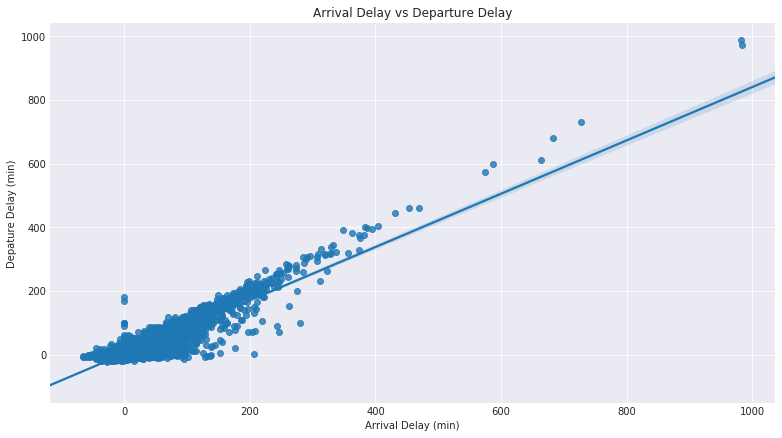

In [33]:
plt.figure(figsize = [13,7])
scatter_data = flightsDF[flightsDF['DepDelay']<1400]
sb.regplot(data=scatter_data, x='ArrDelay',y='DepDelay').set_title('Arrival Delay vs Departure Delay')
plt.xlabel('Arrival Delay (min)')
plt.ylabel('Depature Delay (min)')

## Relationship between Carrier Delay and Departure Delay

> There is fair relationship between Carrier Delay and Depature Delay. This relationship is not very strong.

Text(0,0.5,'Depature Delay (min)')

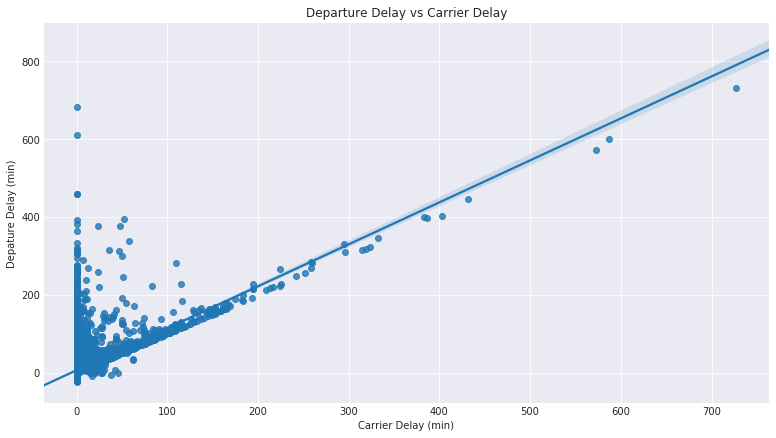

In [34]:
plt.figure(figsize = [13,7])
carrdep = flightsDF[['CarrierDelay','DepDelay']]
carrdep = carrdep[carrdep['DepDelay'] < 900]
sb.regplot(data = carrdep, x='CarrierDelay',y='DepDelay').set_title('Departure Delay vs Carrier Delay')
plt.xlabel('Carrier Delay (min)')
plt.ylabel('Depature Delay (min)')

## Monthly distribution of Arrival Delay and Departure Delay
> Both Arrival and Departure delays have a very high value in the month of August and a very low value in the month of February. Which makes February the best month for travel.

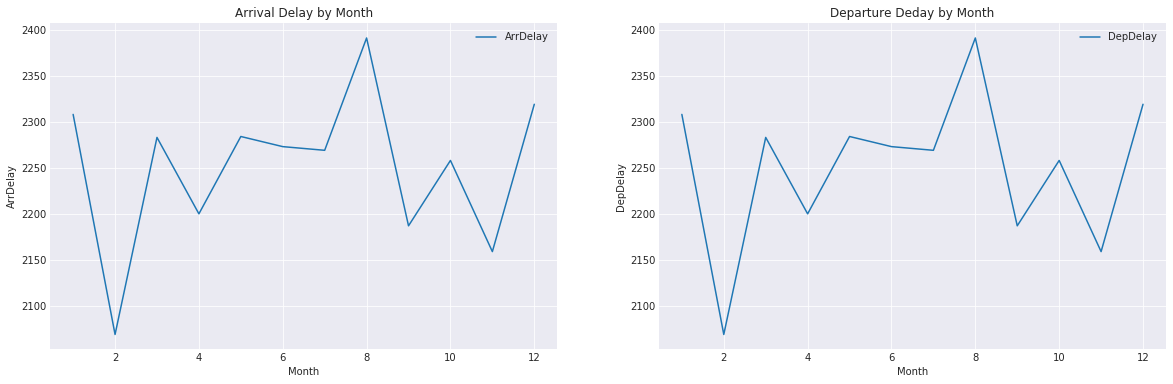

In [35]:

month_arr = aggregateData(flightsDF,'Month','ArrDelay')
month_dep = aggregateData(flightsDF,'Month','DepDelay')
subplotsDiffData(month_arr,month_dep,['line','line'],['Month','ArrDelay'],['Month','DepDelay'],['Arrival Delay by Month','Departure Deday by Month'])

## City vs Depature Delay
> Atlanta (ATL) City has the highest number of Deputure Delays

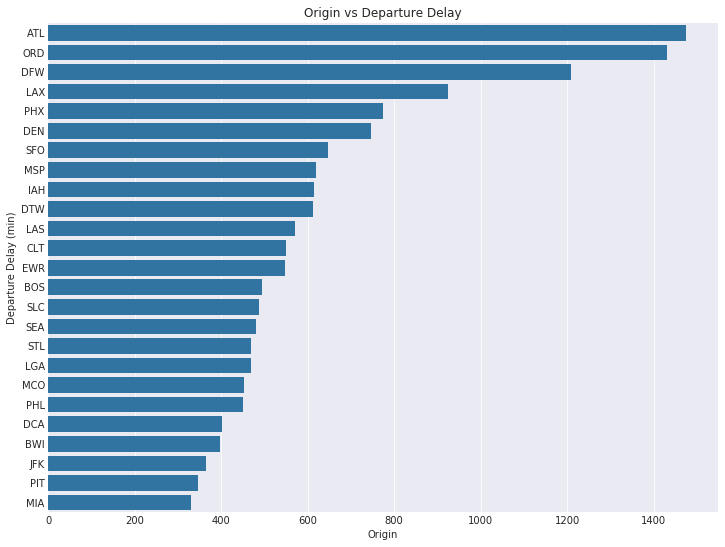

In [36]:
depDelayByOrg = aggregateData(flightsDF,"Origin","DepDelay")
depDelayByOrg.sort_values(by="DepDelay",inplace = True,ascending = False)
top25 = depDelayByOrg.head(25)
barplot(top25,['Origin','DepDelay'], [12,9],"h",'b', 0,"Origin vs Departure Delay",['Origin','Departure Delay (min)'])

## Reasons for Monthly Flight Cancellations
> Weather(B) is the main reason for flight cancellations. With highest number of cancellations recorded in months of January, February and December

Text(0,0.5,'Flights')

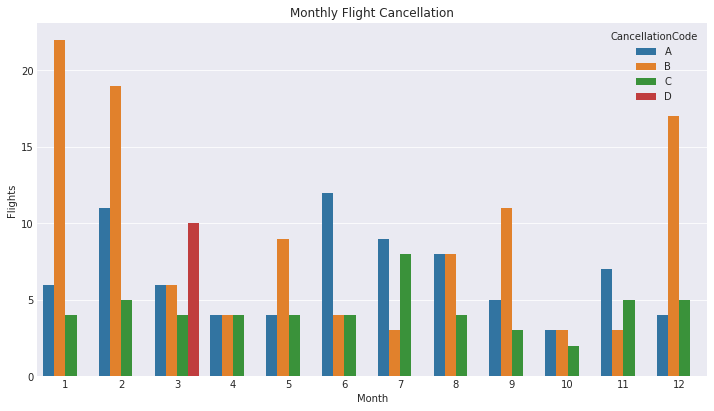

In [37]:
plt.figure(figsize = [12,6.5])
bar_data = flightsDF.groupby(['Month','CancellationCode'])['Flights'].sum().reset_index()
sb.barplot(data=bar_data, x='Month',y='Flights',hue='CancellationCode').set_title("Monthly Flight Cancellation")
plt.ylabel("Flights")

## Distribution of Delays Causes over the Years
NASDelay is the predominant over the years, with Late Air Craft being the lowest. Weather delay is slightly above Carrier delay.



Text(0.5,0,'Years')

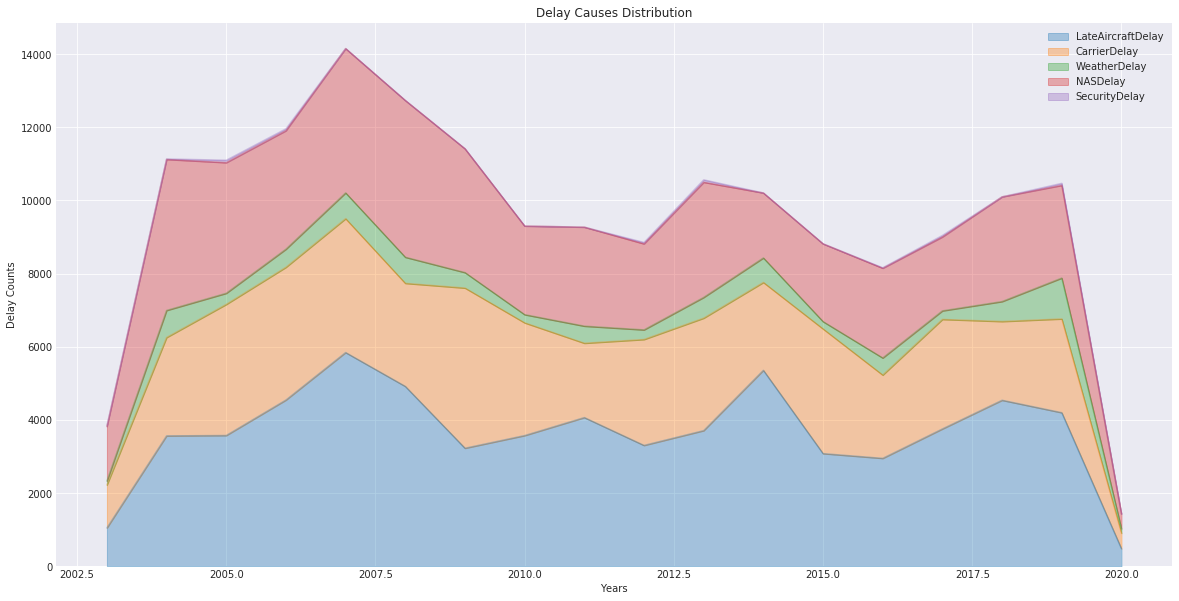

In [38]:
delaysDF = flightsDF.filter(['Year','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
delaysDF = delaysDF.groupby('Year')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum()
ax = delaysDF.loc[2003:].plot(kind='area', alpha=0.35, figsize=(20, 10))
ax.set_title('Delay Causes Distribution')
ax.set_ylabel('Delay Counts')
ax.set_xlabel('Years')


In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 603776 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 